# Music Genre Classification



**Using Tabular Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv('/content/features_30_sec.csv')
df.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:

df = df.drop(['filename', 'length'], axis=1)

df.head()


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
# Features
X = df.drop('label', axis=1)

# Target Labels
y = df['label']


In [ ]:
# Convert string labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check encoded labels
print(np.unique(y))


[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Split into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Scale features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

Accuracy: 0.685

Classification Report:
               precision    recall  f1-score   support

       blues       0.78      0.70      0.74        20
   classical       0.82      0.90      0.86        20
     country       0.70      0.80      0.74        20
       disco       0.64      0.35      0.45        20
      hiphop       0.56      0.75      0.64        20
        jazz       0.67      0.80      0.73        20
       metal       0.76      0.80      0.78        20
         pop       0.73      0.80      0.76        20
      reggae       0.53      0.45      0.49        20
        rock       0.67      0.50      0.57        20

    accuracy                           0.69       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.68      0.69      0.68       200



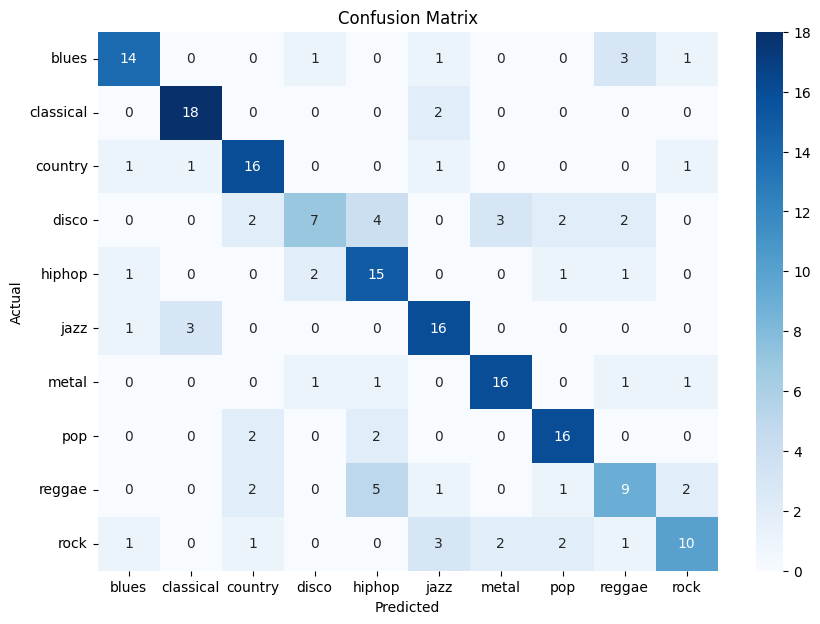

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Using Image dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

In [ ]:
# Set path to dataset folder
dataset_path = '/content/drive/MyDrive/images_original'

# Image size (VGG16 requires 224x224)
img_size = (224, 224)
batch_size = 32

# Data Augmentation & Rescaling
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # 80% Train, 20% Validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 831 images belonging to 10 classes.
Found 206 images belonging to 10 classes.


In [ ]:
# Load VGG16 base model (pre-trained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

# Build custom classifier on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 673s 26s/step - accuracy: 0.1899 - loss: 36.0211 - val_accuracy: 0.3204 - val_loss: 1.8987
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 306ms/step - accuracy: 0.2400 - loss: 2.0475 - val_accuracy: 0.2621 - val_loss: 1.9571
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 340ms/step - accuracy: 0.3058 - loss: 1.8605 - val_accuracy: 0.3447 - val_loss: 1.7139
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - accuracy: 0.3366 - loss: 1.8320 - val_accuracy: 0.4563 - val_loss: 1.6594
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - accuracy: 0.3860 - loss: 1.6350 - val_accuracy: 0.3592 - val_loss: 1.7003
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step - accuracy: 0.4229 - loss: 1.5507 - val_accuracy: 0.4757 - val_loss: 1.6609
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.4258 - loss: 1.5716 - val_accuracy: 0.4806 - val_loss: 1.5673
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.4604 - loss: 1.4490 - val_accuracy:

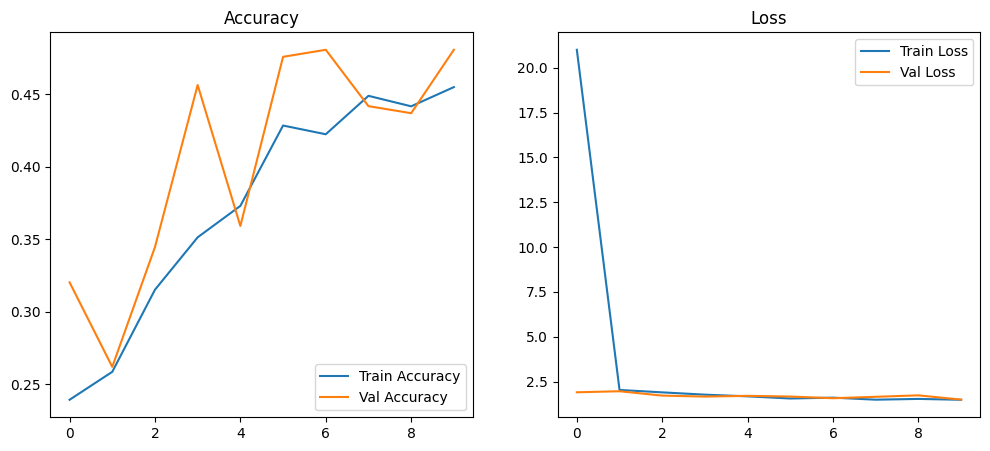

In [ ]:
# Plot Accuracy & Loss
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
# Evaluate on Validation Set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.4718 - loss: 1.4246
Validation Accuracy: 0.4806


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
dataset_path = '/content/drive/MyDrive/images_original'

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # 80% Train, 20% Validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 831 images belonging to 10 classes.
Found 206 images belonging to 10 classes.


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers for now


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


Epoch 1/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1377 - loss: 2.3750 - val_accuracy: 0.4272 - val_loss: 1.9246
Epoch 2/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.3233 - loss: 1.9009 - val_accuracy: 0.4660 - val_loss: 1.6803
Epoch 3/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.4442 - loss: 1.6693 - val_accuracy: 0.5049 - val_loss: 1.5458
Epoch 4/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.4796 - loss: 1.5840 - val_accuracy: 0.5000 - val_loss: 1.4699
Epoch 5/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.5302 - loss: 1.4672 - val_accuracy: 0.5340 - val_loss: 1.4182
Epoch 6/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.5597 - loss: 1.3924 - val_accuracy: 0.5631 - val_loss: 1.3650
Epoch 7/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.5471 - loss: 1.3935 - val_accuracy: 0.5534 - val_loss: 1.3445
Epoch 8/15
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.5653 - loss: 1.3230 - val_accuracy: 0.5

In [ ]:
# Unfreeze last 20 layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue Training (Fine-tuning phase)
fine_tune_history = model.fit(
    train_generator,
    epochs=10,  # You can increase if needed
    validation_data=val_generator
)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4052 - loss: 1.6620 - val_accuracy: 0.5583 - val_loss: 1.2672
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.5106 - loss: 1.5081 - val_accuracy: 0.5534 - val_loss: 1.3009
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.4933 - loss: 1.4844 - val_accuracy: 0.5437 - val_loss: 1.3180
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.4670 - loss: 1.4904 - val_accuracy: 0.5243 - val_loss: 1.3225
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step - accuracy: 0.5304 - loss: 1.4195 - val_accuracy: 0.5340 - val_loss: 1.3172
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.5295 - loss: 1.4344 - val_accuracy: 0.5437 - val_loss: 1.3106
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.5701 - loss: 1.3428 - val_accuracy: 0.5485 - val_loss: 1.3020
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.5645 - loss: 1.3647 - val_accuracy: 0.5

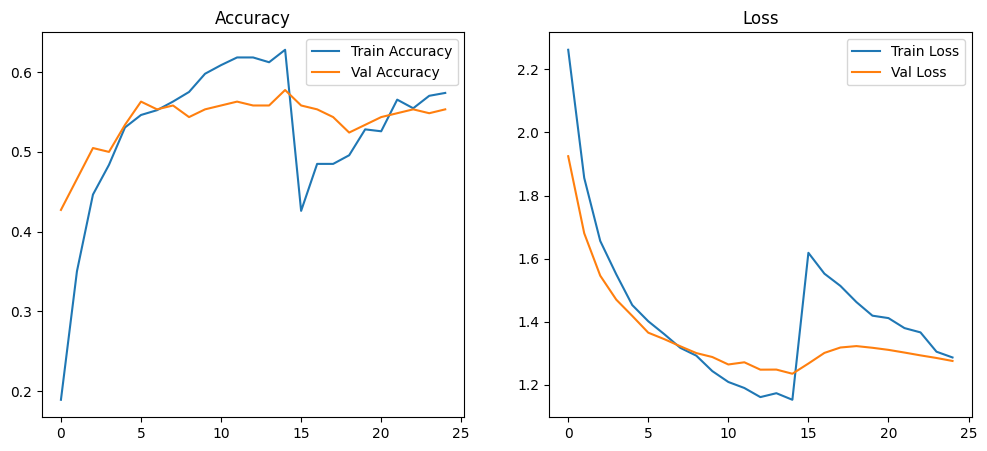

In [ ]:
# Plot Training & Fine-tuning History
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.5341 - loss: 1.3336
Validation Accuracy: 0.5534


# **Results Comparison:**

# In the music genre classification task, the tabular approach (using extracted features) outperformed the image-based spectrogram approach, achieving a higher accuracy of 68.5% compared to 55.3% from image-based validation. The tabular model also showed strong class-wise performance, especially in genres like classical, metal, and pop, with f1-scores above 0.75. This suggests that numerical features like tempo, spectral bandwidth, and chroma can effectively capture genre-specific patterns. In contrast, the image-based model struggled likely due to  data size, or insufficient spectrogram resolution. Tabular models are computationally lighter and offer better interpretability, making them advantageous for smaller or feature-rich datasets.